In [27]:
import yfinance as yf
import pandas as pd
import datetime
import investpy
import statistics
import numpy as np
import matplotlib.pyplot as plt
import nelson_siegel_svensson  
from nelson_siegel_svensson import NelsonSiegelSvenssonCurve, NelsonSiegelCurve
from nelson_siegel_svensson.calibrate import calibrate_ns_ols, calibrate_nss_ols


In [28]:
##Gold, Equity ETF, and Bitcoin data importing for full 2020##
dfx1 = investpy.get_etf_historical_data(etf='Perth Mint Physical Gold', country='United States', from_date='01/01/2020', to_date='31/12/2020')
dfx2 = investpy.get_etf_historical_data(etf='Vanguard FTSE Developed Markets', country='United States', from_date='01/01/2020', to_date='31/12/2020')
dfx3 = investpy.get_crypto_historical_data(crypto='bitcoin', from_date='01/01/2020', to_date='31/12/2020')

##Gold, equity and bitcoin prices for Apr-Dec 2020##
df_gold = investpy.get_etf_historical_data(etf='Perth Mint Physical Gold', country='United States', from_date='01/04/2020', to_date='31/12/2020')
df_equity = investpy.get_etf_historical_data(etf='Vanguard FTSE Developed Markets', country='United States', from_date='01/04/2020', to_date='31/12/2020')
df_bitcoin = investpy.get_crypto_historical_data(crypto='bitcoin', from_date='01/04/2020', to_date='31/12/2020')

##Gold, equity and bitcoin returns calculation##
gold_return = df_gold['Close'].pct_change()
equity_return = df_equity['Close'].pct_change()
bitcoin_return = df_bitcoin['Close'].pct_change()

In [29]:
##Calculation moving averages of close prices##
dfx1['SMA_20'] = dfx1.iloc[:,3].rolling(window=20).mean()
dfx2['SMA_20'] = dfx1.iloc[:,3].rolling(window=20).mean()
dfx3['SMA_20'] = dfx1.iloc[:,3].rolling(window=20).mean()

##making the final apr-dec dataframe for graph making##
df_gold.head(40)

,Open,High,Low,Close,Volume,Currency,Exchange
Date,,,,,,,
2020-04-01,15.74,16.16,15.68,15.87,296162,USD,NYSE
2020-04-02,16.21,16.21,15.99,16.18,99208,USD,NYSE
2020-04-03,16.15,16.23,16.08,16.18,160300,USD,NYSE
2020-04-06,16.40,16.65,16.32,16.65,334799,USD,NYSE
2020-04-07,16.48,16.55,16.38,16.54,213956,USD,NYSE
2020-04-08,16.51,16.52,16.40,16.42,110727,USD,NYSE
2020-04-09,16.75,16.85,16.68,16.79,283080,USD,NYSE
2020-04-13,16.99,17.20,16.82,17.14,521573,USD,NYSE
2020-04-14,17.34,17.43,17.02,17.25,536423,USD,NYSE


In [22]:
range = (dfx1['Date'] > '2020-4-1') & (dfx1['Date'] <= '2020-12-31')

KeyError: 'Date'

In [9]:
## Calculating average and Standard deviation for benchmark yields##
df1_oct = df1.loc['2019-10-01':'2019-10-31']
df1_oct_mean = df1_oct['Close'].mean()
df1_oct_std = numpy.std(df1_oct['Close'])

df1_nov = df1.loc['2019-11-01':'2019-11-30']
df1_nov_mean = df1_nov['Close'].mean()
df1_nov_std = numpy.std(df1_nov['Close'])

df2_oct = df2.loc['2019-10-01':'2019-10-31']
df2_oct_mean = df2_oct['Close'].mean()
df2_oct_std = numpy.std(df2_oct['Close'])

df2_nov = df2.loc['2019-11-01':'2019-11-30']
df2_nov_mean = df2_nov['Close'].mean()
df2_nov_std = numpy.std(df2_nov['Close'])

df3_oct = df3.loc['2019-10-01':'2019-10-31']
df3_oct_mean = df3_oct['Close'].mean()
df3_oct_std = numpy.std(df3_oct['Close'])

df3_nov = df3.loc['2019-11-01':'2019-11-30']
df3_nov_mean = df3_nov['Close'].mean()
df3_nov_std = numpy.std(df3_nov['Close'])

df4_oct = df4.loc['2019-10-01':'2019-10-31']
df4_oct_mean = df4_oct['Close'].mean()
df4_oct_std = numpy.std(df4_oct['Close'])

df4_nov = df4.loc['2019-11-01':'2019-11-30']
df4_nov_mean = df4_nov['Close'].mean()
df4_nov_std = numpy.std(df4_nov['Close'])

df5_oct = df5.loc['2019-10-01':'2019-10-31']
df5_oct_mean = df5_oct['Close'].mean()
df5_oct_std = numpy.std(df5_oct['Close'])

df5_nov = df5.loc['2019-11-01':'2019-11-30']
df5_nov_mean = df5_nov['Close'].mean()
df5_nov_std = numpy.std(df5_nov['Close'])

df6_oct = df6.loc['2019-10-01':'2019-10-31']
df6_oct_mean = df6_oct['Close'].mean()
df6_oct_std = numpy.std(df6_oct['Close'])

df6_nov = df6.loc['2019-11-01':'2019-11-30']
df6_nov_mean = df6_nov['Close'].mean()
df6_nov_std = numpy.std(df6_nov['Close'])

In [10]:
## Calculating average and Standard deviation for Gold and Equity ETFs##
dfx1_oct = dfx1.loc['2019-10-01':'2019-10-31']
dfx1_oct_mean = dfx1_oct['Close'].mean()
dfx1_oct_std = numpy.std(dfx1_oct['Close'])

dfx1_nov = dfx1.loc['2019-11-01':'2019-11-30']
dfx1_nov_mean = dfx1_nov['Close'].mean()
dfx1_nov_std = numpy.std(dfx1_nov['Close'])

dfx2_oct = dfx2.loc['2019-10-01':'2019-10-31']
dfx2_oct_mean = dfx2_oct['Close'].mean()
dfx2_oct_std = numpy.std(dfx2_oct['Close'])

dfx2_nov = dfx2.loc['2019-11-01':'2019-11-30']
dfx2_nov_mean = dfx2_nov['Close'].mean()
dfx2_nov_std = numpy.std(dfx2_nov['Close'])


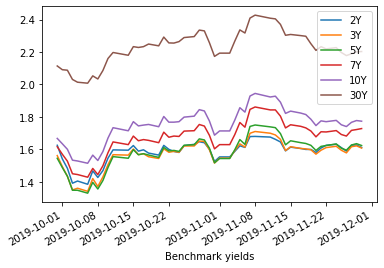

In [20]:
## Plotting the chart for benchmark yields##
df_yield.plot(x ='Date', y=['2Y', '3Y', '5Y', '7Y', '10Y', '30Y'], kind = 'line')
plt.xlabel("Benchmark yields")
plt.show()

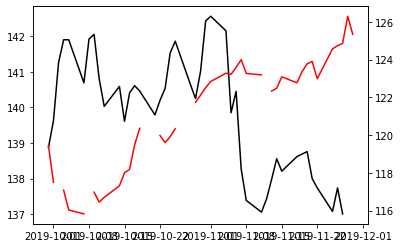

In [23]:
## Plotting the chart for ETFs ##
#df_etf.plot(x ='Date', y='goldetf', kind = 'line')

fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()

ax_left.plot(df_etf['goldetf'], color='black')
ax_right.plot(df_etf['equityetf'], color='red')
plt.show()

In [28]:
##nelson_siegel_svensson analysis##
t = np.array([0.0,0.5,1.0,2.0,3.0,5.0,7.0,8.0,10.0, 15.0, 20.0, 25.0, 30.0])
y=np.array([0.01,0.02,0.025,0.029,0.03,0.033,0.036,0.039,0.04,0.043,0.045,0.047,0.049])
curve_fit, status = calibrate_nss_ols(t,y)
NSS_ZC = NelsonSiegelSvenssonCurve.zero(curve_fit,t)
NSS_Fwd = NelsonSiegelSvenssonCurve.forward(curve_fit,t)

In [29]:
NSS_ZC

array([0.01258954, 0.01820316, 0.02250176, 0.02832095, 0.03177049,
       0.03523392, 0.03696464, 0.0376413 , 0.03892042, 0.04212211,
       0.04504614, 0.04742136, 0.04926421])